C:\Users\33670\miniconda3\envs\py38\lib\site-packages\mplfinance\plotting.py:476: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


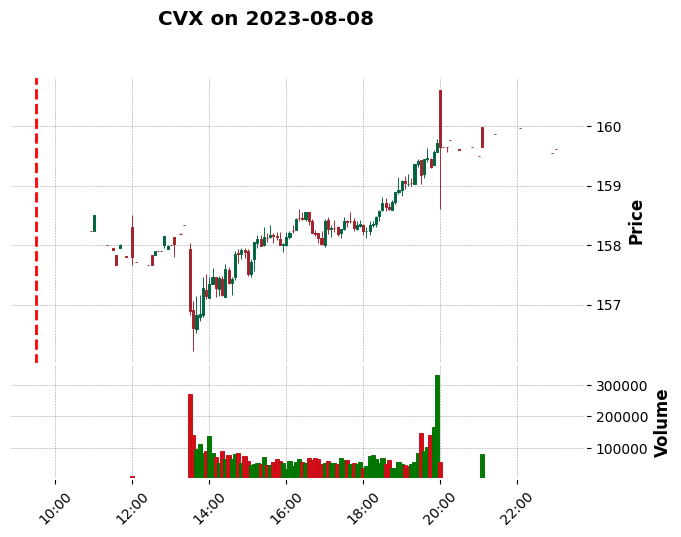

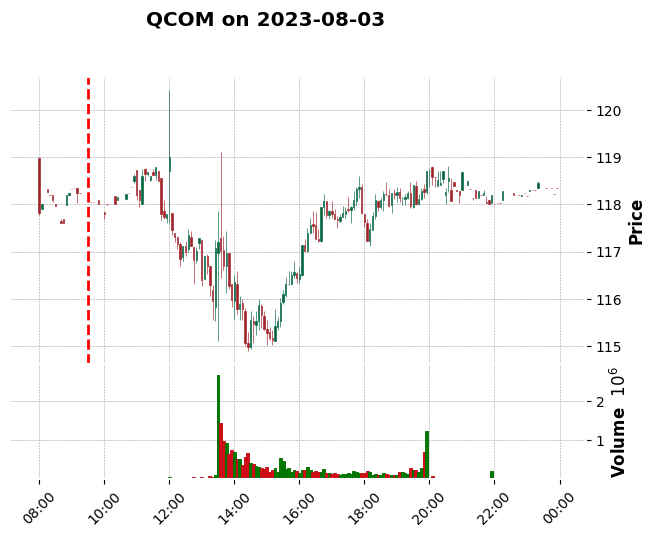

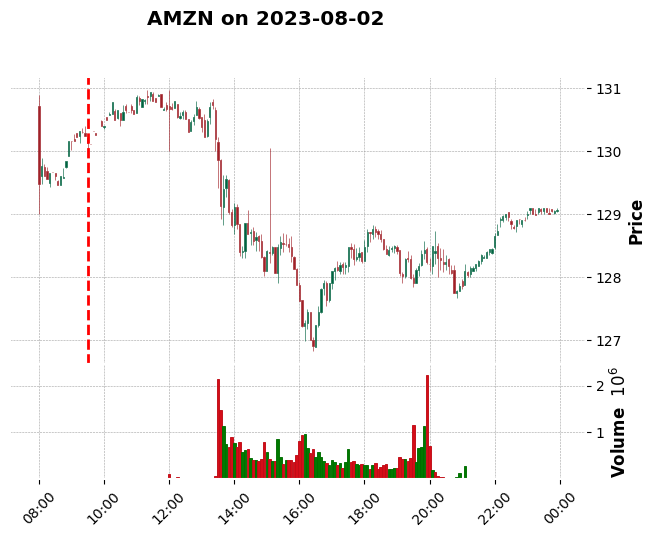

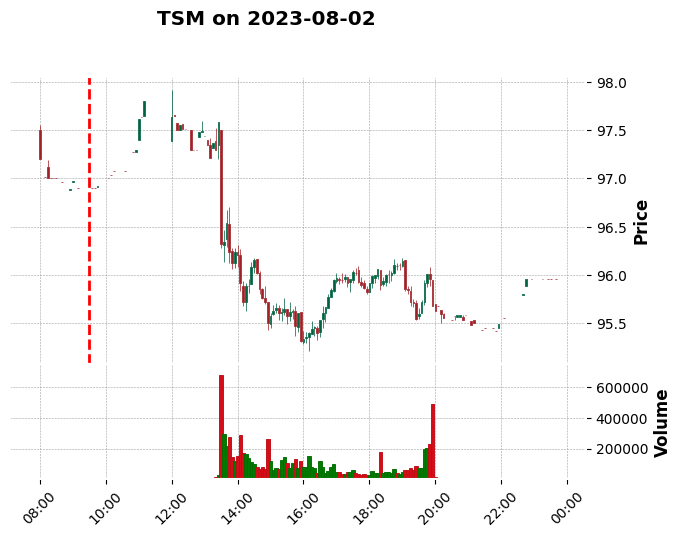

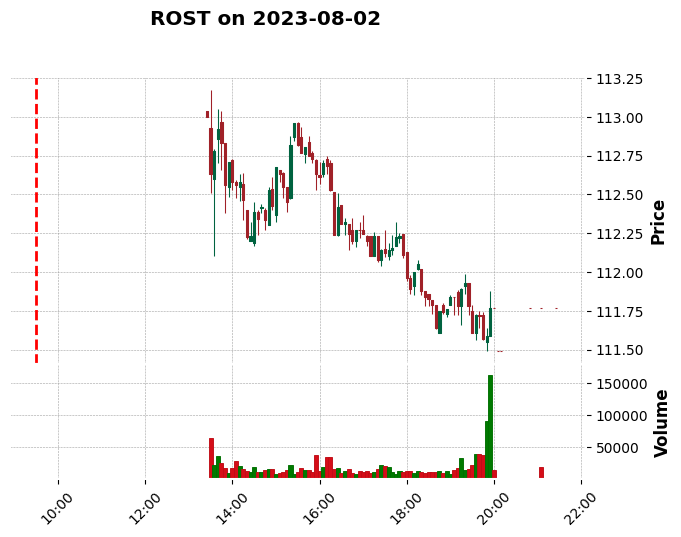

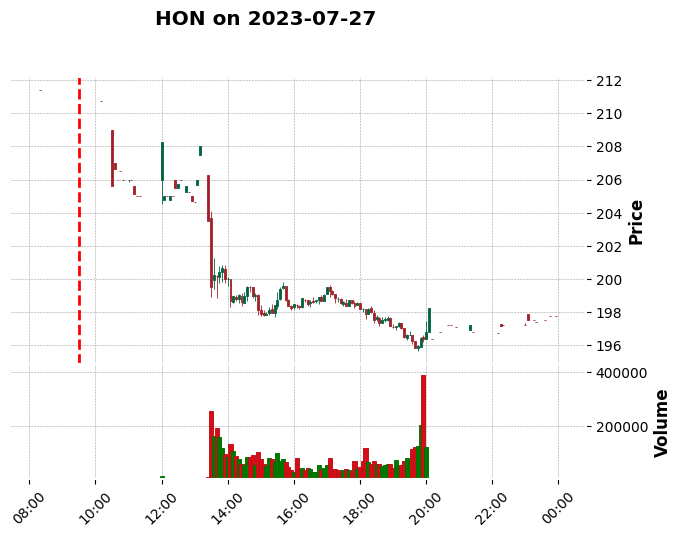

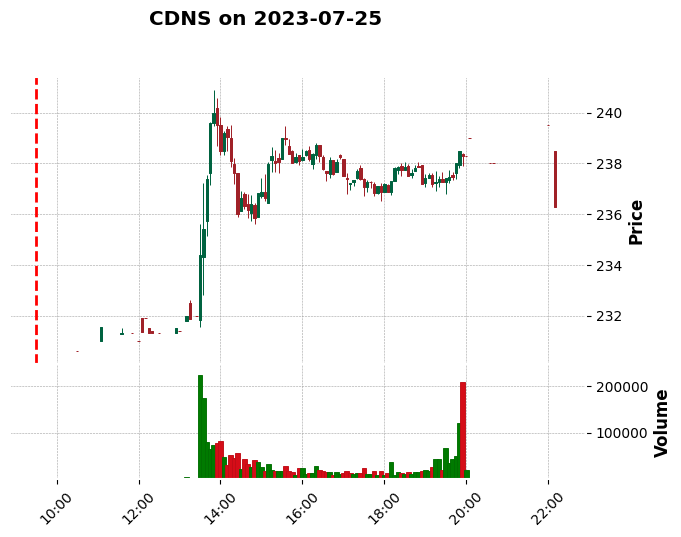

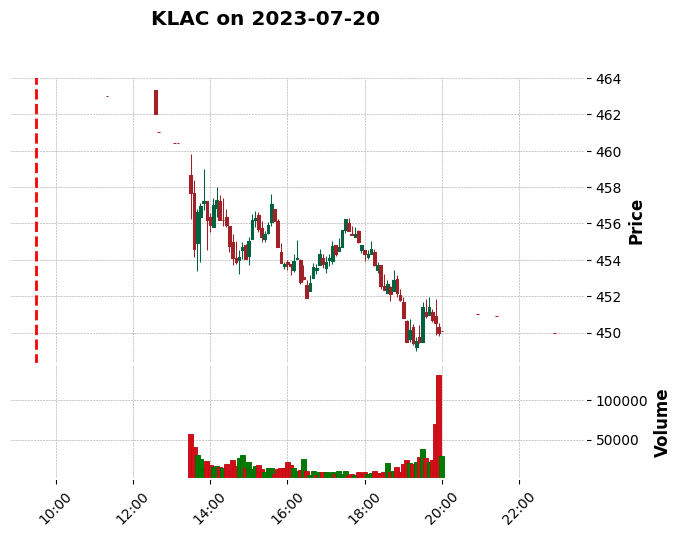

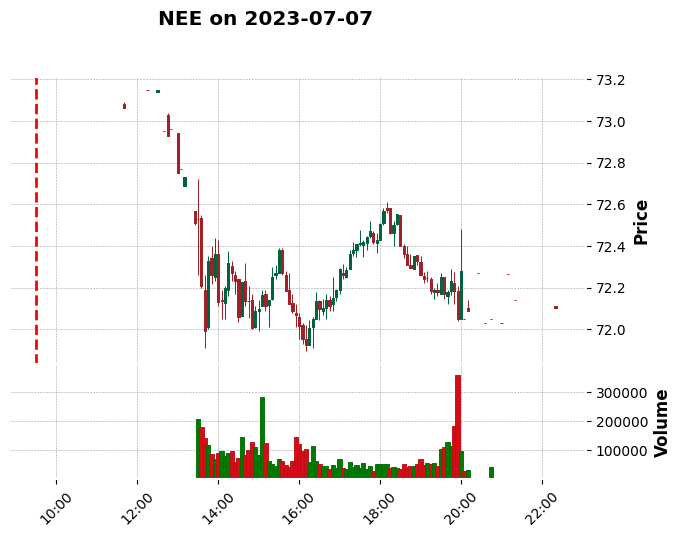

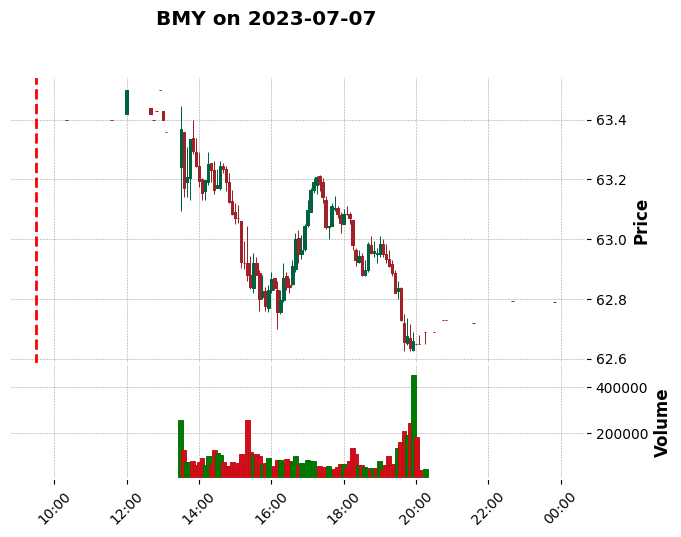

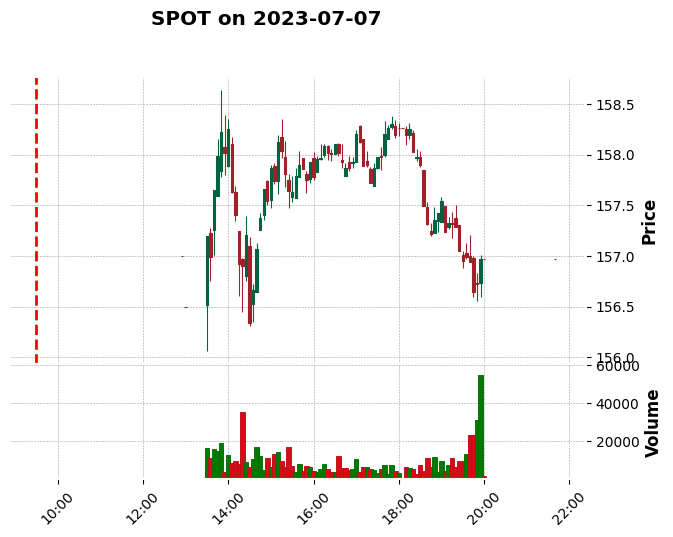

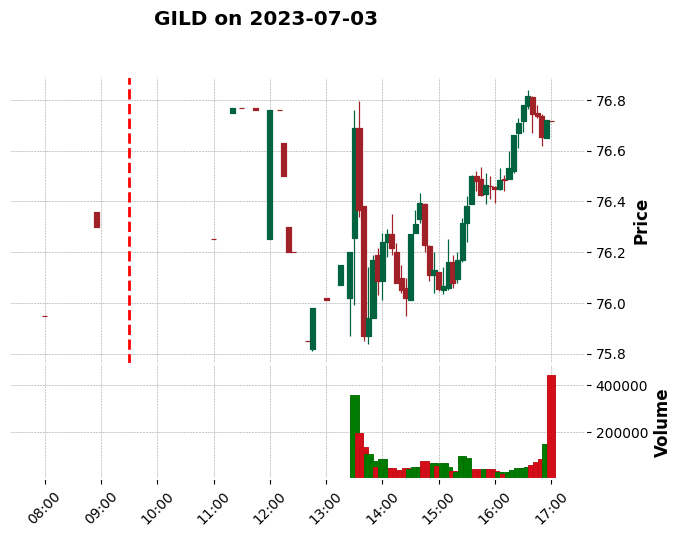

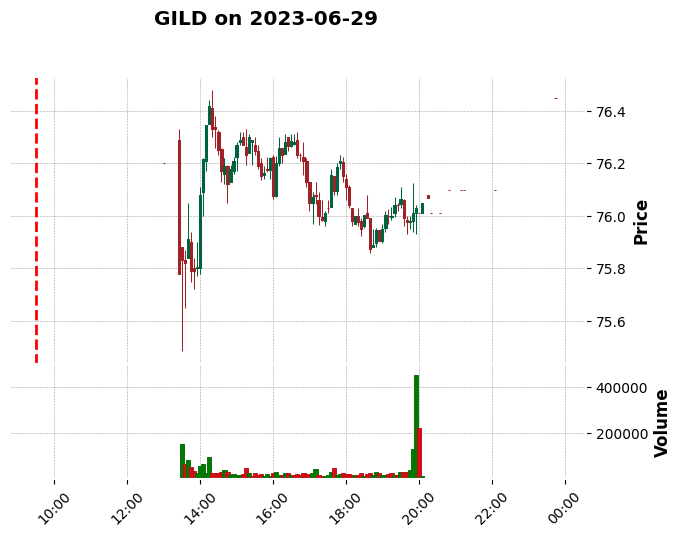

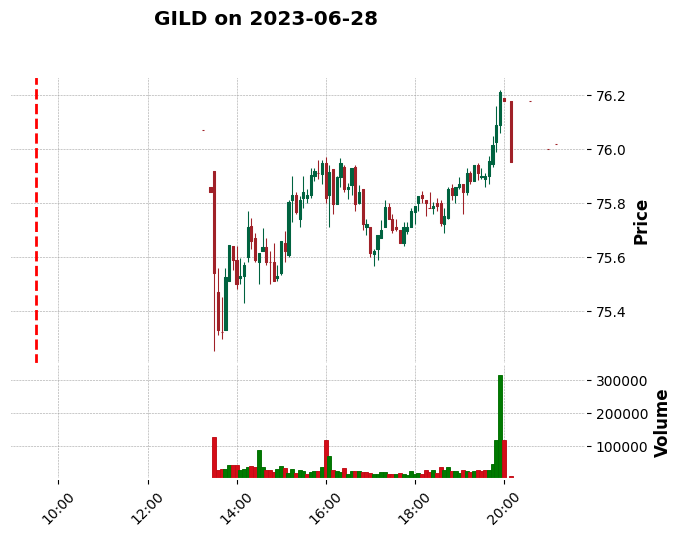

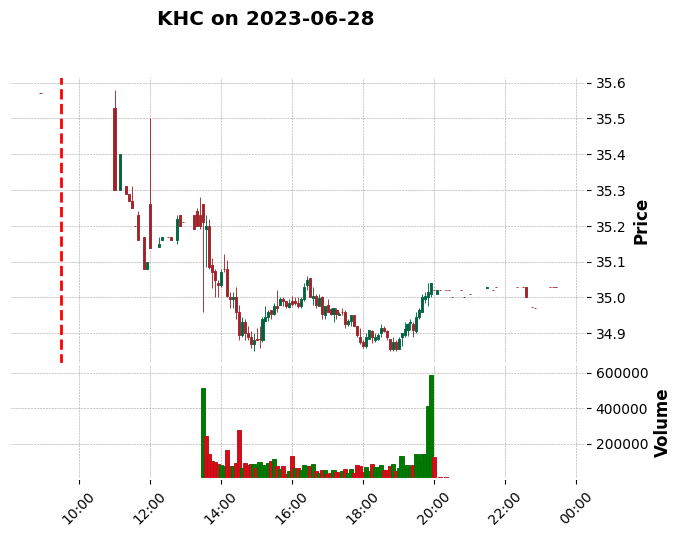

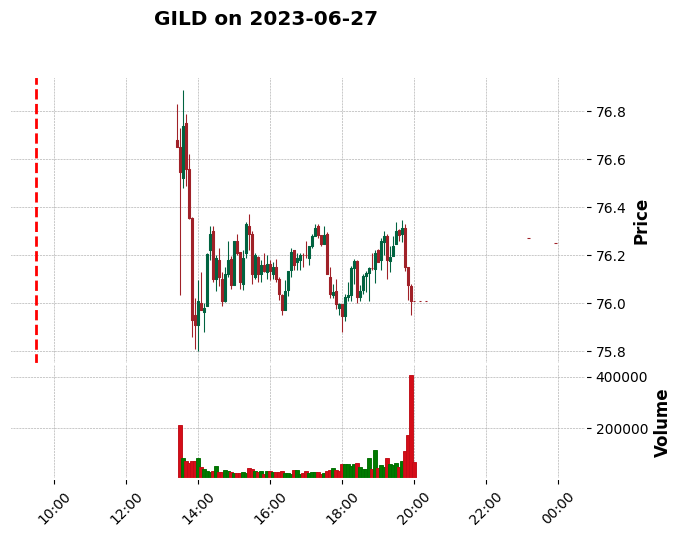

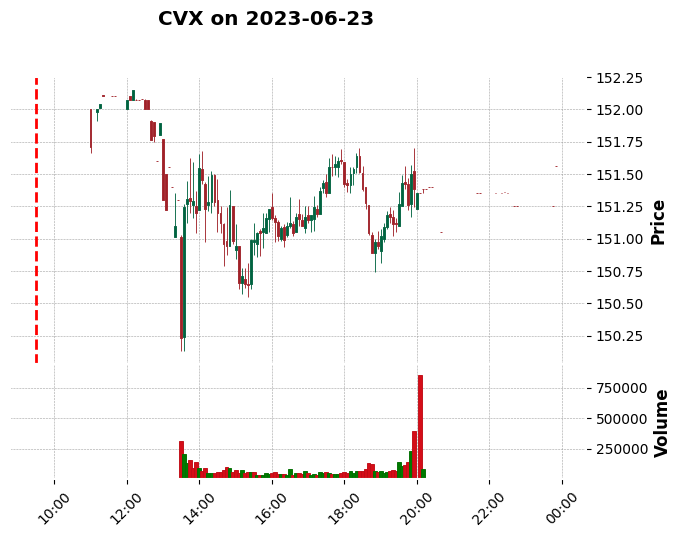

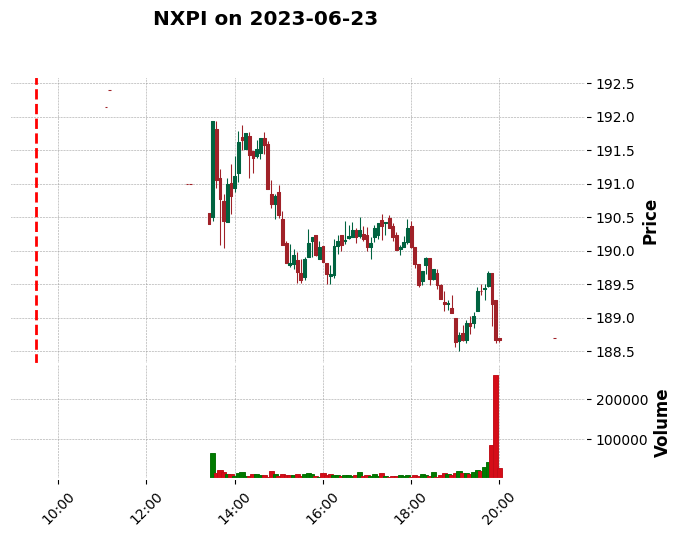

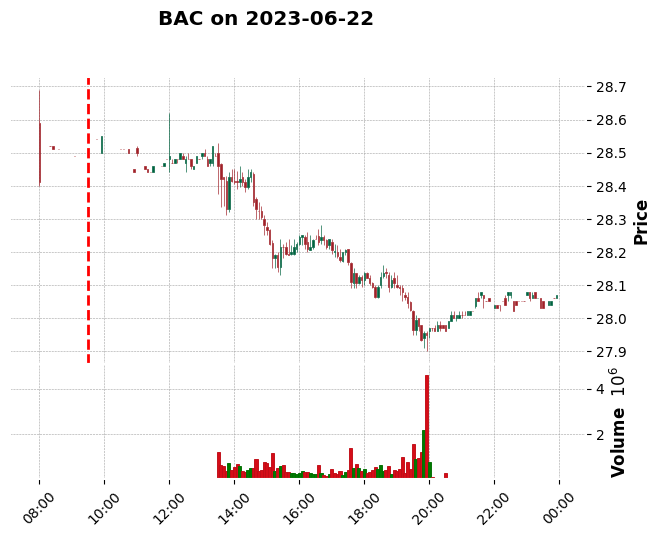

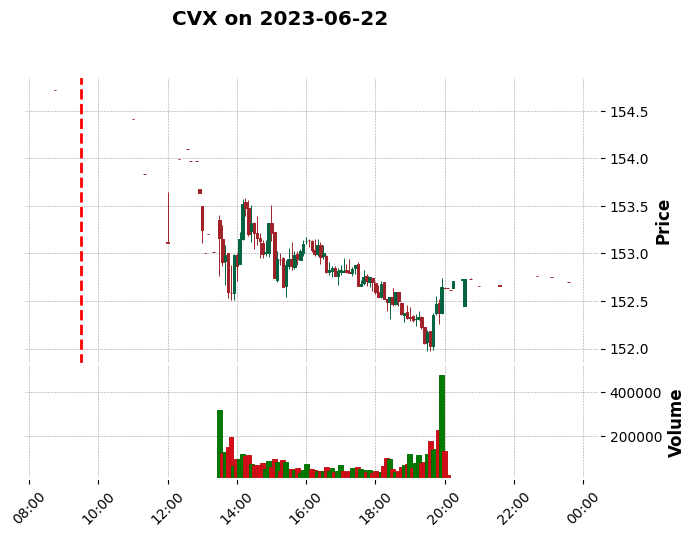

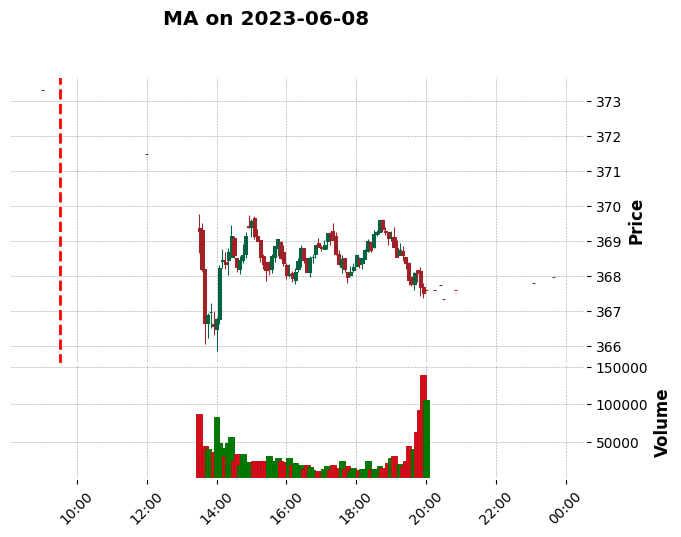

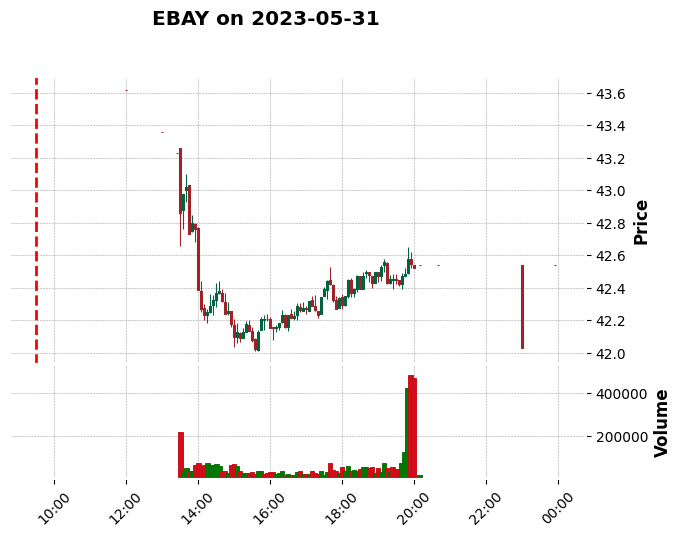

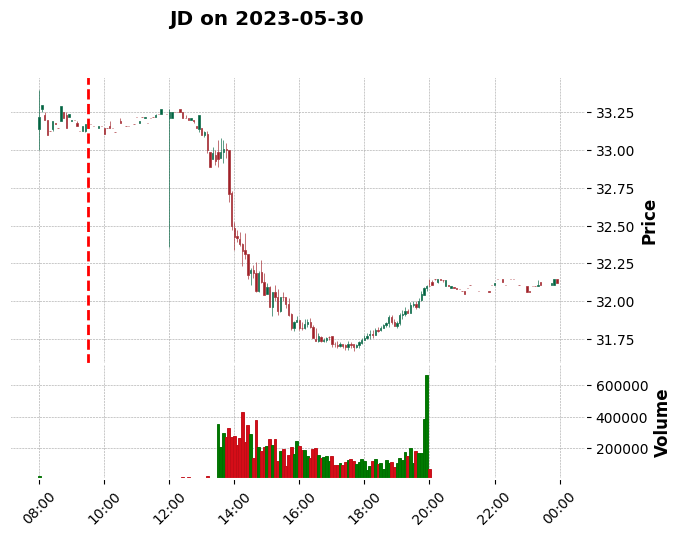

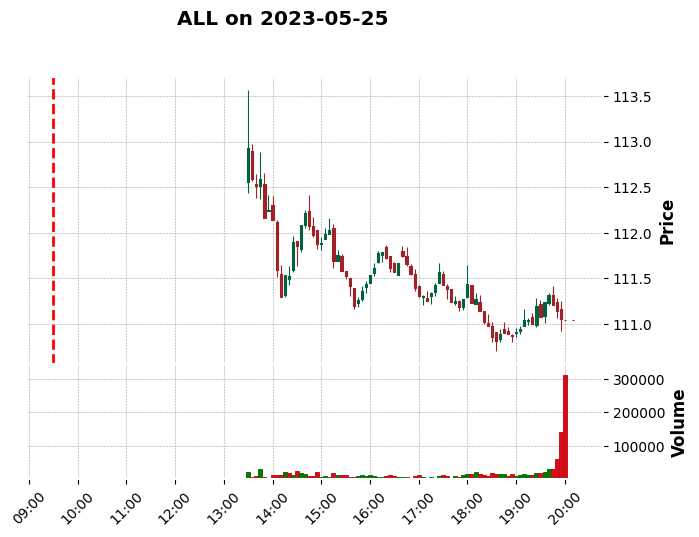

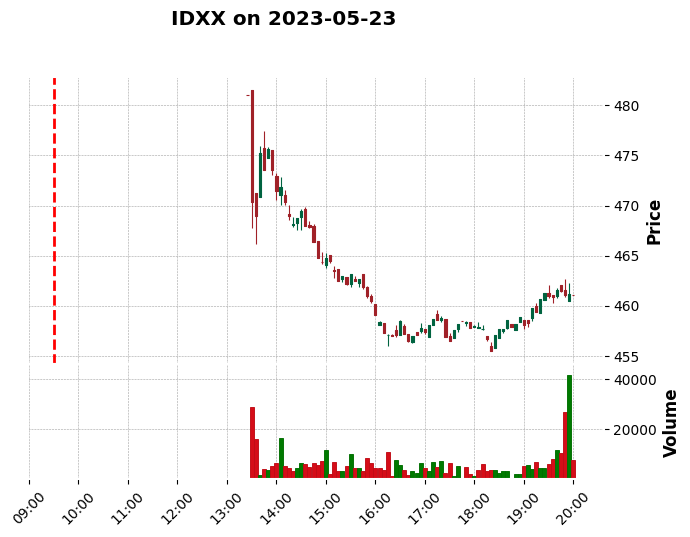

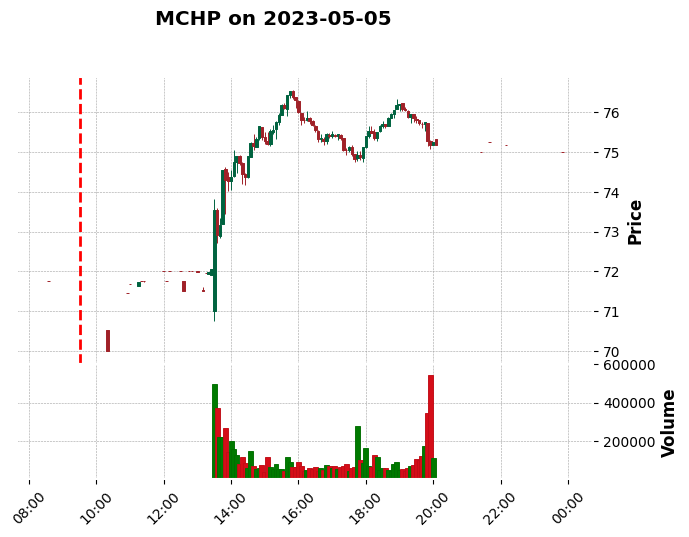

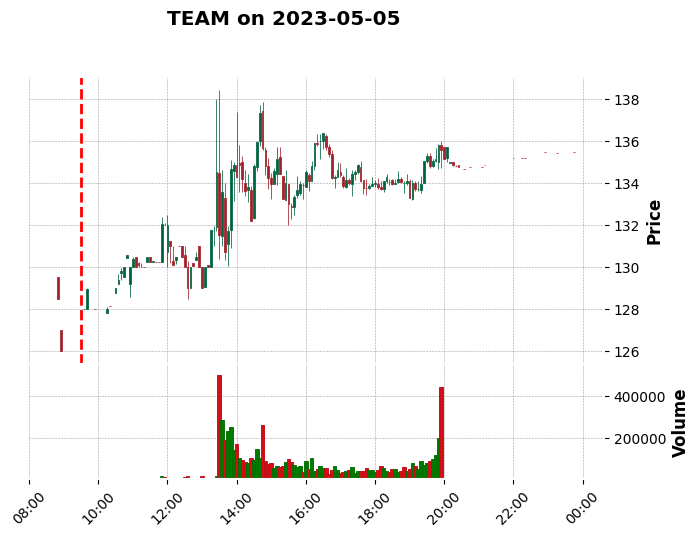

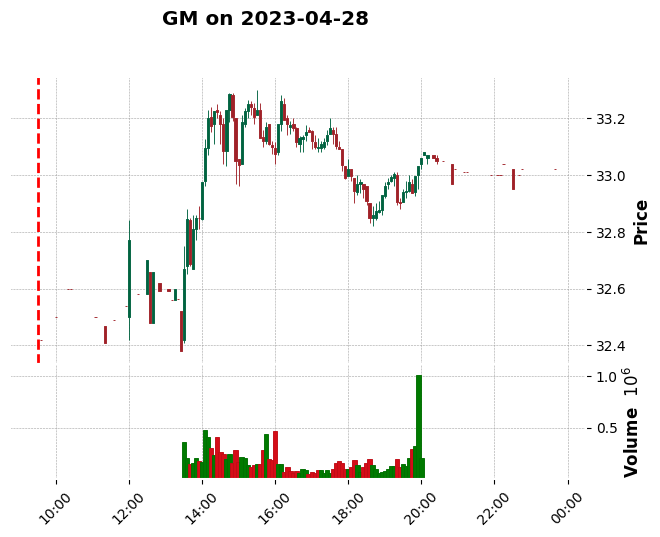

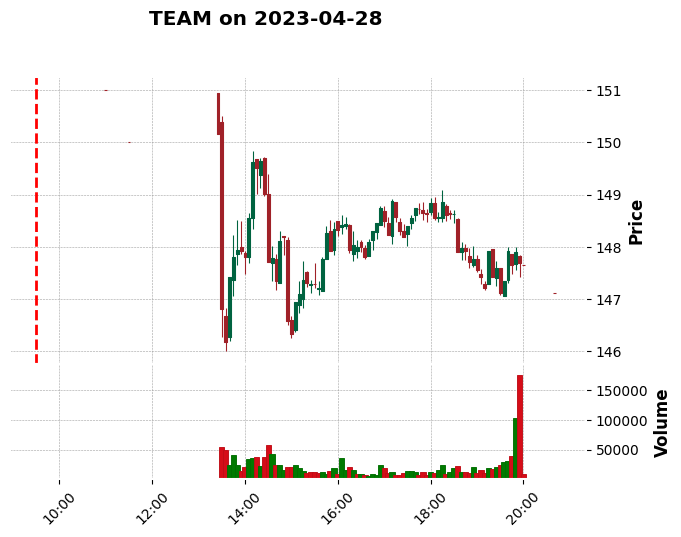

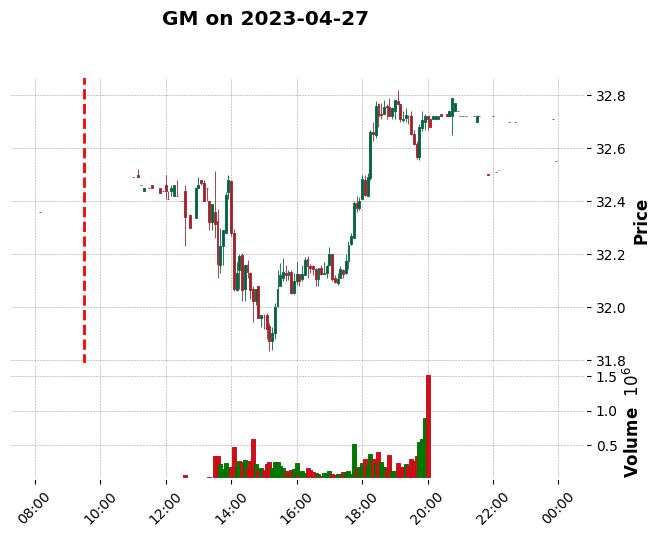

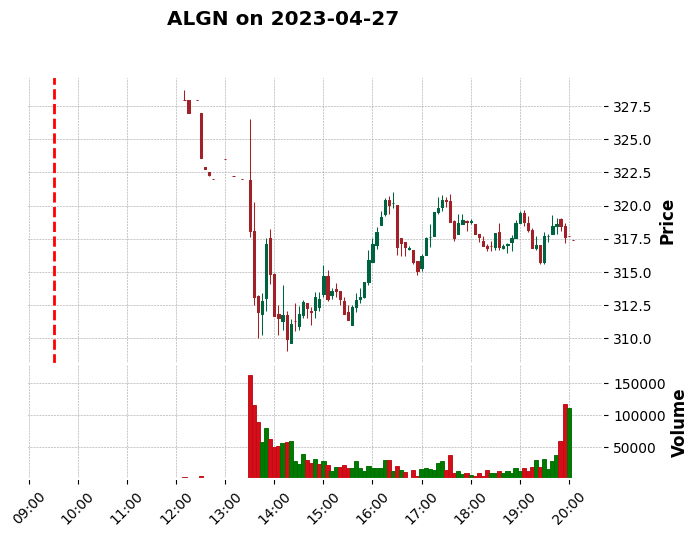

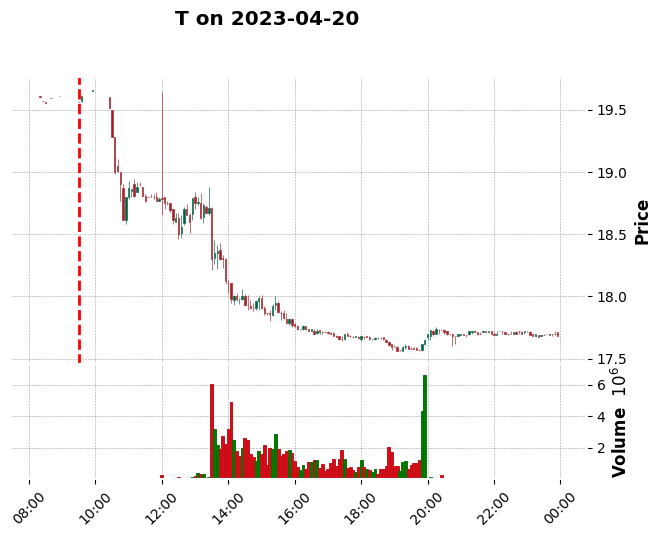

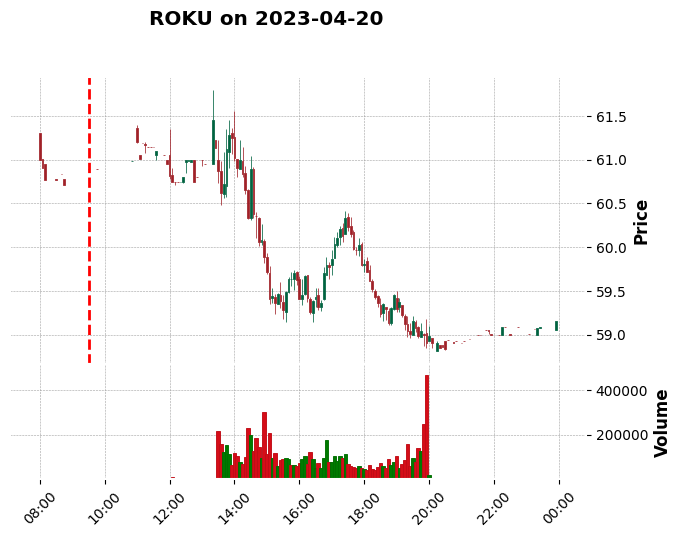

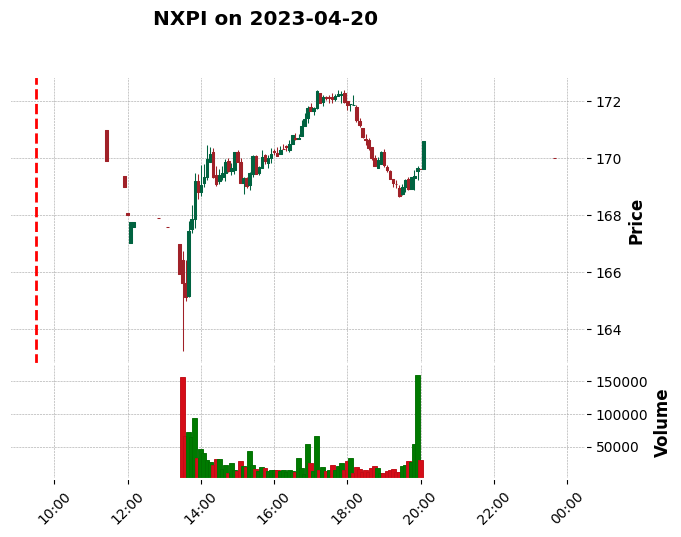

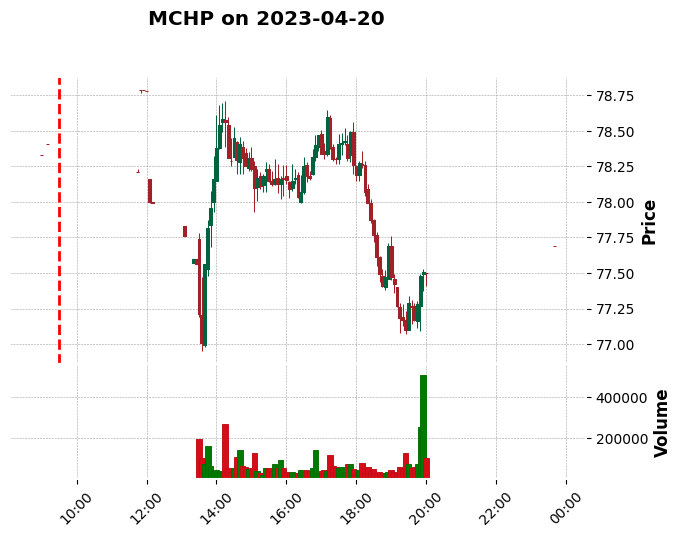

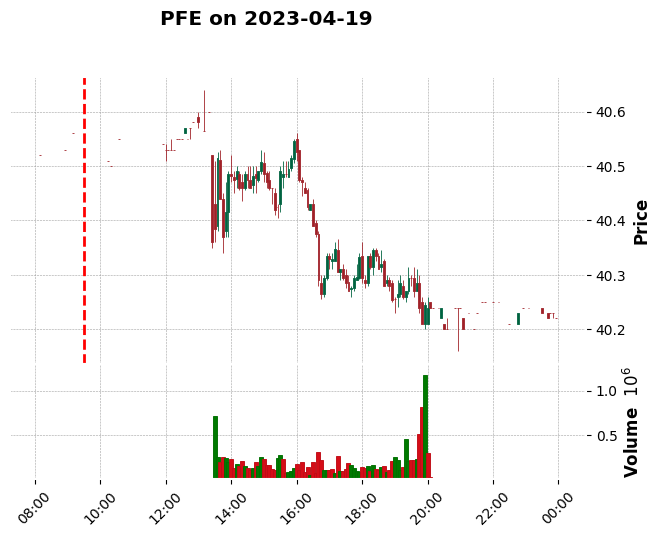

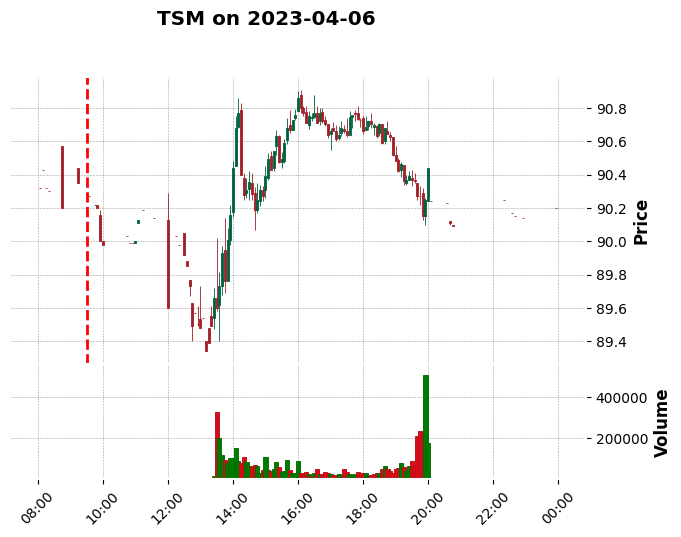

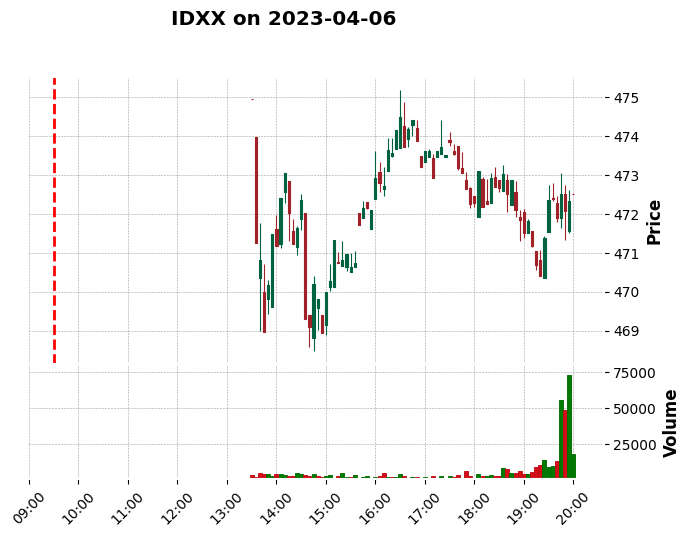

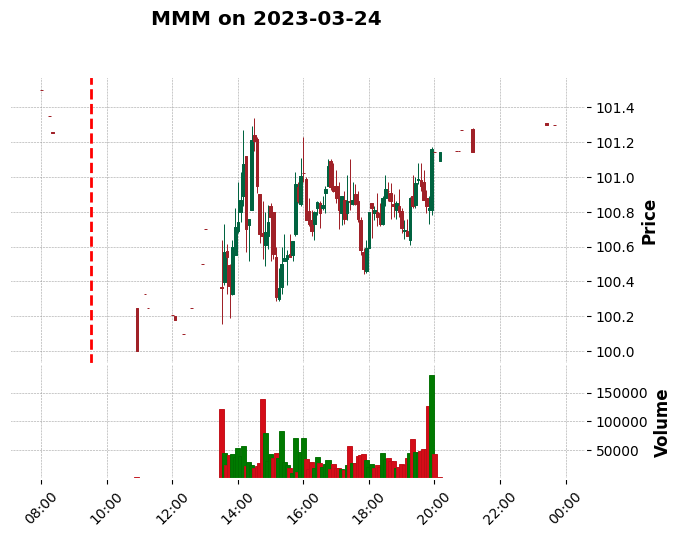

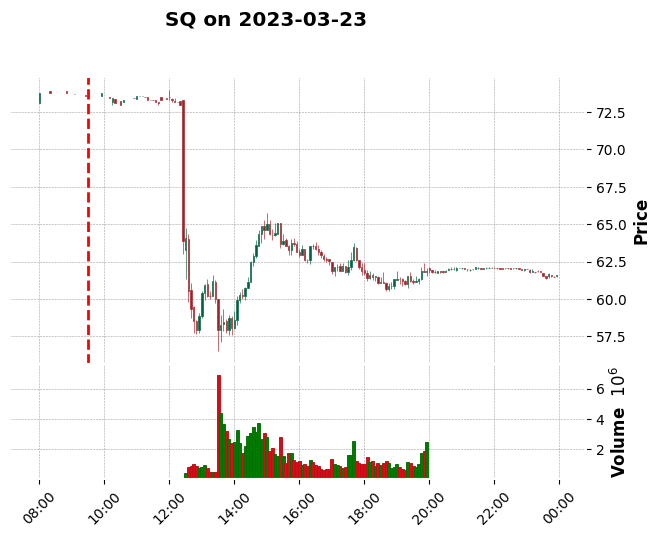

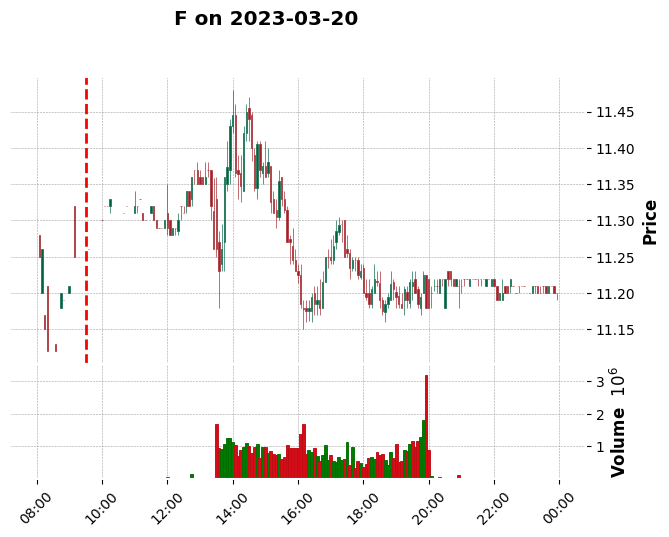

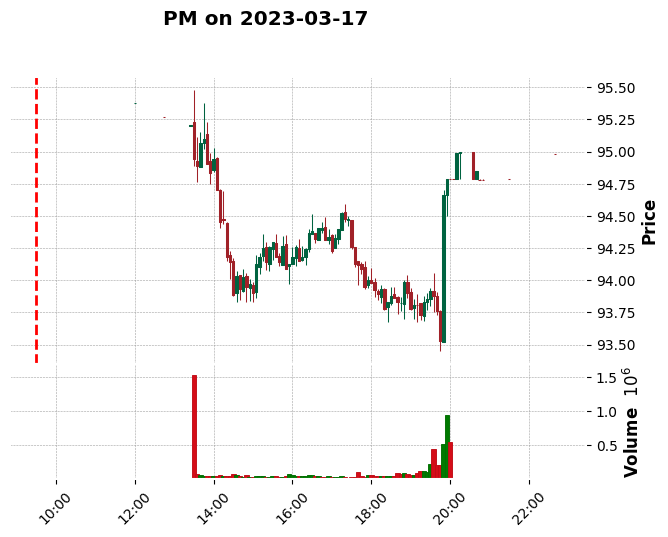

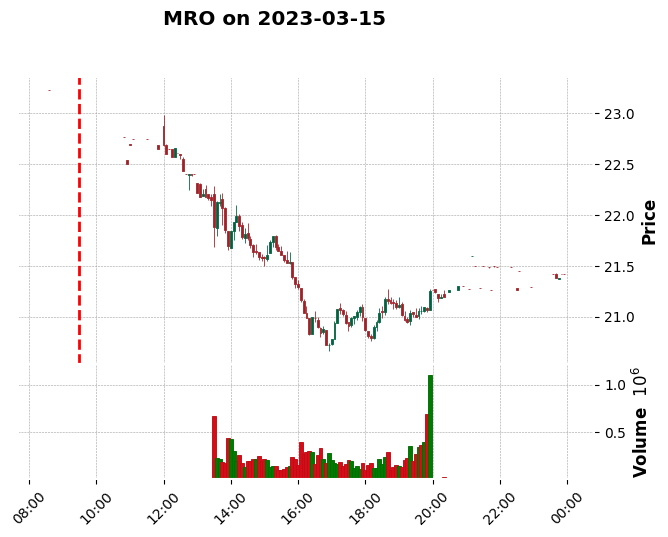

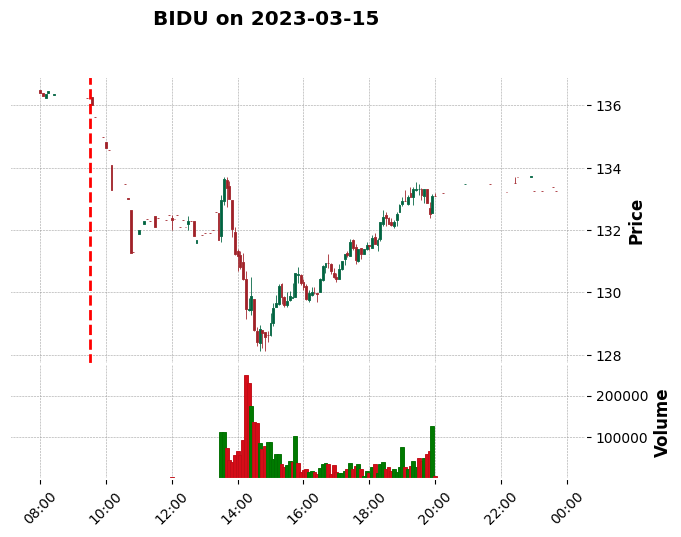

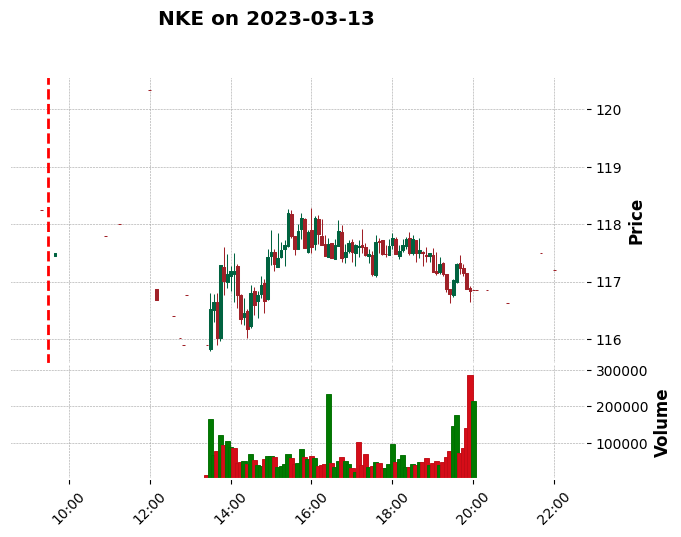

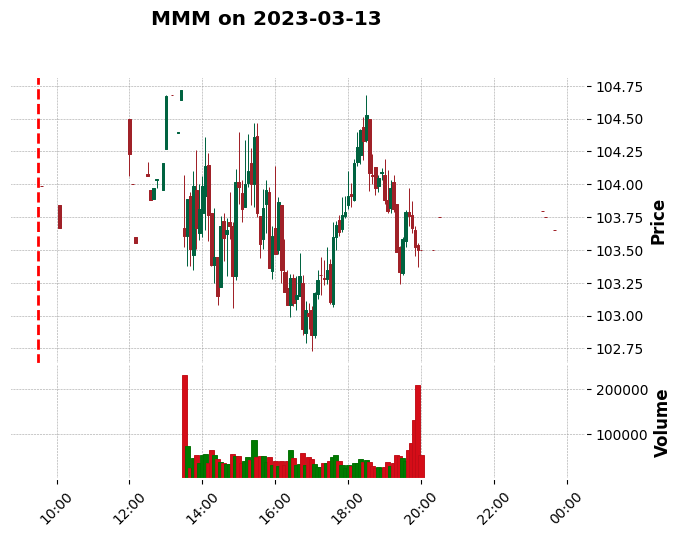

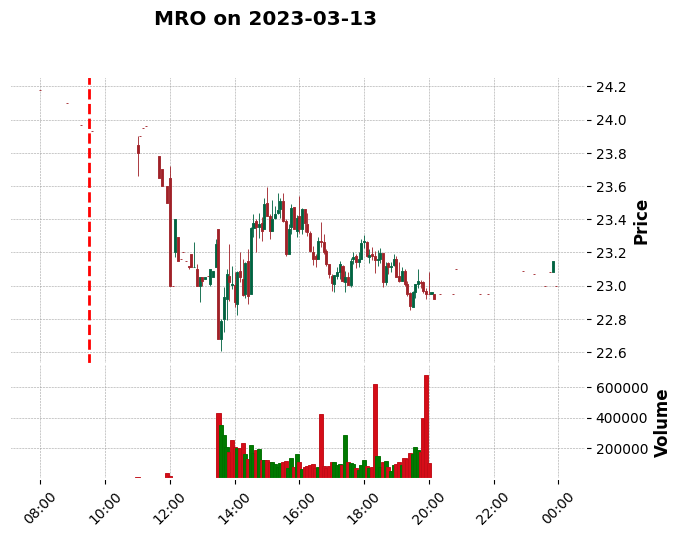

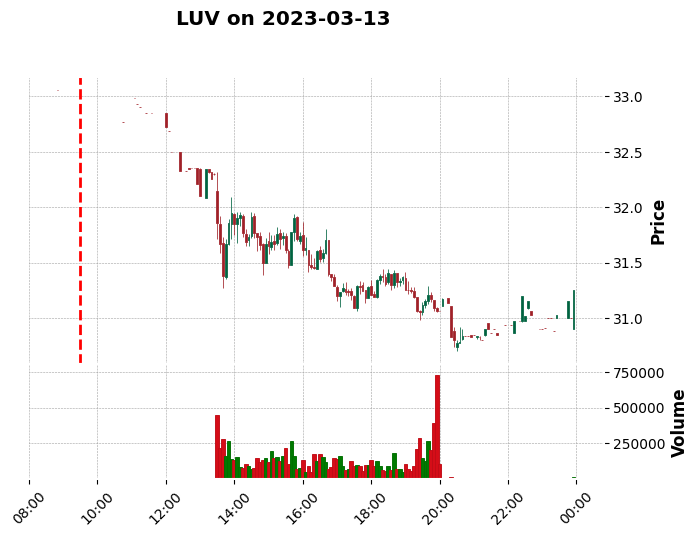

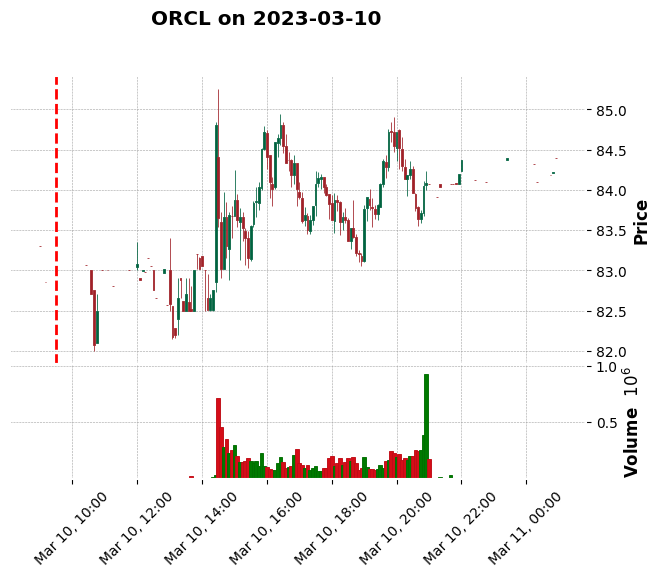

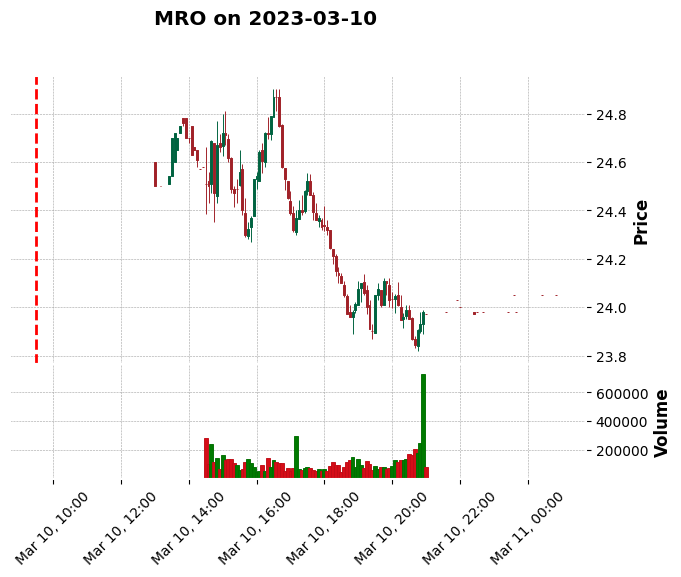

In [24]:
import pandas as pd
import mplfinance as mpf
import requests

def get_ohlc(ticker,date):
    url = "https://api.polygon.io/v2/aggs/ticker/"+ str(ticker) +"/range/5/minute/"+ date +"/"+ date +"?adjusted=true&sort=asc&apiKey=AmUE0EZEpoHRVhOqO7OUDB6Szrugvtp0"
    response = requests.get(url)
    #print(json.dumps(response.json(), indent=1))
    return response.json()['results']   

def plot_candlestick(data, title, market_open_time="13:30"):
    # Extraction de l'année, du mois et du jour pour construire la datetime de l'ouverture du marché
    year, month, day = data.index[0].year, data.index[0].month, data.index[0].day
    open_datetime = pd.to_datetime(f"{year}-{month}-{day} {market_open_time}")

    # Ajout de la délimitation verticale pour l'ouverture du marché
    fig, axes = mpf.plot(data, type='candle', style='charles', title=title, volume=True, show_nontrading=True, returnfig=True)
    axes[0].axvline(open_datetime, color='r', linestyle='--')



def main():
    # Chargement du CSV
    df = pd.read_csv(r'C:\Users\33670\Desktop\framework\notebooks\data\for_graph.csv')
    df = df.head(50)

    for index, row in df.iterrows():
        date = row['date']
        ticker = row['ticker']

        ohlc_data = get_ohlc(ticker, date)
        df_5min = pd.DataFrame.from_records(ohlc_data)
        df_5min['date'] = pd.to_datetime(df_5min['t'], unit='ms')
        df_5min = df_5min.rename(columns={'o':'Open','h':'High','c':'Close','l':'Low','v':'Volume'})
        df_5min.set_index('date', inplace=True)
        
         # Affichage du graphique en chandeliers
        plot_candlestick(df_5min, f"{ticker} on {date}")
        
main()
